In [1]:
# IMDB 리뷰 데이터 셋

from tensorflow.keras.datasets import imdb

(train_input, train_target), (test_input, test_target) \
            = imdb.load_data(num_words=500)

In [2]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [3]:
print(len(train_input[0]), len(train_input[1]))

218 189


In [4]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [5]:
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [6]:
# 훈련 세트에서 2(어휘 사전에 없는 단어) 제외하기

for i in range(len(train_input)):
    train_input[i] = [w for w in train_input[i] if w > 2]
    
print(train_input[0])
print(len(train_input[0]))

[14, 22, 16, 43, 65, 458, 66, 4, 173, 36, 256, 5, 25, 100, 43, 112, 50, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 336, 385, 39, 4, 172, 17, 38, 13, 447, 4, 192, 50, 16, 6, 147, 19, 14, 22, 4, 469, 4, 22, 71, 87, 12, 16, 43, 38, 76, 15, 13, 4, 22, 17, 17, 12, 16, 18, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 16, 480, 66, 33, 4, 130, 12, 16, 38, 5, 25, 124, 51, 36, 135, 48, 25, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 8, 4, 107, 117, 15, 256, 4, 7, 5, 36, 71, 43, 476, 26, 400, 317, 46, 7, 4, 13, 104, 88, 4, 381, 15, 297, 98, 32, 56, 26, 141, 6, 194, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 88, 12, 16, 283, 5, 16, 113, 103, 32, 15, 16, 19, 178, 32]
177


In [7]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target \
        = train_test_split(train_input, train_target, 
                           test_size=0.2, random_state=1234)

In [8]:
import numpy as np

lengths = np.array([len(x) for x in train_input])

In [9]:
print(np.mean(lengths), np.median(lengths))

164.0498 126.0


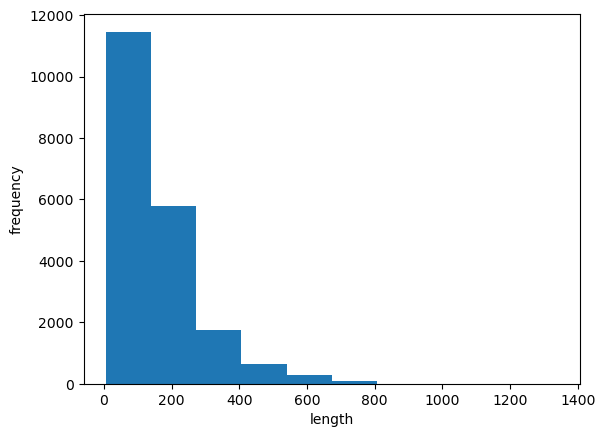

In [10]:
import matplotlib.pyplot as plt

plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [11]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100) 
train_seq.shape

(20000, 100)

In [12]:
train_seq[0]

array([  7,   4,  33,   4,  58,   5,  17, 118,  17,  31,  70,   7, 330,
        11,  14,   4, 201, 127, 179,  73,   9,  55,  52,  17,   9,  13,
        62, 190, 423,   8,  28, 188,  53,  23,   4,  19, 409,  11,  88,
       122,  24,  81, 233,  23,  27, 205,  29,  69,  84, 187,  90,  15,
        90,   8,   4, 400, 209,   5, 434, 209, 303,  23,  11,  27,  51,
        16, 170, 143,   5, 330,  12,  62,  28,  77,   8,  67,  53,   7,
       134,  21,  13, 440,  12,  80,  97,  84,   4,  53,  12, 238,  82,
        97,  84, 391, 138, 294,  40,  30,   8,  11])

In [13]:
train_seq[12]

array([  0,   0,   0,   0,   0,   0,   0, 108,  26,  83,   6,  48,  24,
       407,   6,   9, 160, 463,   7,   6,  20,  15, 304,  84,   5,  68,
       261,   4,  26,  42,  33, 113,  42, 341,  36, 131,  66,  14, 100,
        10,  10,  50,  26, 275, 133,  63, 413,  31,   9,  44,   4, 250,
        37, 152,   8,   4,   8,   4, 375,  31,   9,  44,   4, 255,  37,
         4,   7,  41, 113,  11,   6, 160,   9,  44,   4, 250,  19,  41,
       131, 160,  31,   9,  44,   4,   7,   6,  37, 220, 283, 119,  10,
        10, 407, 290, 319,  45,  11,   4, 193, 372])

In [14]:
val_seq = pad_sequences(val_input, maxlen=100)

### 순환 신경망 만들기

In [15]:
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.SimpleRNN(8, input_shape=(100, 500)))
model.add(keras.layers.Dense(units=1, activation='sigmoid'))

In [16]:
train_oh = keras.utils.to_categorical(train_seq)
train_oh.shape

(20000, 100, 500)

In [17]:
val_oh = keras.utils.to_categorical(val_seq)
val_oh.shape

(5000, 100, 500)

In [18]:
train_oh[0:2]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics='accuracy')

In [25]:
loss = model.fit(train_oh, train_target, epochs=50, 
                 validation_data=(val_oh, val_target))

Epoch 1/50
625/625 [==============================] - 12s 17ms/step - loss: 0.6534 - accuracy: 0.6228 - val_loss: 0.6351 - val_accuracy: 0.6538
Epoch 2/50
625/625 [==============================] - 11s 17ms/step - loss: 0.6048 - accuracy: 0.6984 - val_loss: 0.5910 - val_accuracy: 0.7096
Epoch 3/50
625/625 [==============================] - 11s 17ms/step - loss: 0.5631 - accuracy: 0.7405 - val_loss: 0.5594 - val_accuracy: 0.7376
Epoch 4/50
625/625 [==============================] - 11s 17ms/step - loss: 0.5376 - accuracy: 0.7579 - val_loss: 0.5466 - val_accuracy: 0.7394
Epoch 5/50
625/625 [==============================] - 11s 17ms/step - loss: 0.5124 - accuracy: 0.7756 - val_loss: 0.5220 - val_accuracy: 0.7572
Epoch 6/50
625/625 [==============================] - 11s 17ms/step - loss: 0.4950 - accuracy: 0.7826 - val_loss: 0.5095 - val_accuracy: 0.7674
Epoch 7/50
625/625 [==============================] - 11s 17ms/step - loss: 0.4800 - accuracy: 0.7915 - val_loss: 0.5061 - val_accuracy:

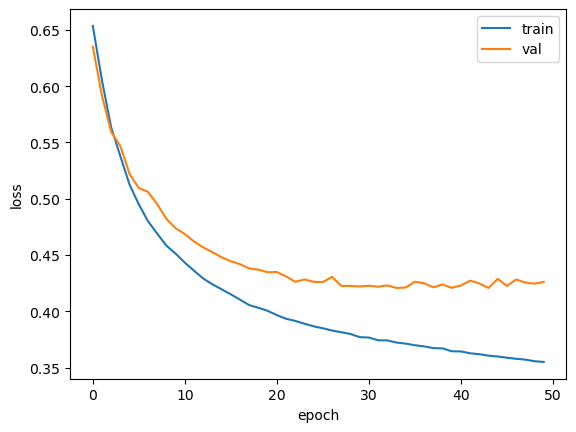

In [27]:
plt.plot(loss.history['loss'])
plt.plot(loss.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### 단어 임베딩 사용하기

In [34]:
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           8000      
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [35]:
model2.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics='accuracy')

In [36]:
loss = model2.fit(train_seq, train_target, epochs=50, 
                 validation_data=(val_seq, val_target))

Epoch 1/50
625/625 [==============================] - 10s 14ms/step - loss: 0.6950 - accuracy: 0.5016 - val_loss: 0.6922 - val_accuracy: 0.5186
Epoch 2/50
625/625 [==============================] - 8s 13ms/step - loss: 0.6891 - accuracy: 0.5372 - val_loss: 0.6892 - val_accuracy: 0.5360
Epoch 3/50
625/625 [==============================] - 8s 13ms/step - loss: 0.6830 - accuracy: 0.5661 - val_loss: 0.6856 - val_accuracy: 0.5498
Epoch 4/50
625/625 [==============================] - 8s 13ms/step - loss: 0.6749 - accuracy: 0.5867 - val_loss: 0.6813 - val_accuracy: 0.5632
Epoch 5/50
625/625 [==============================] - 9s 14ms/step - loss: 0.6658 - accuracy: 0.6059 - val_loss: 0.6778 - val_accuracy: 0.5618
Epoch 6/50
625/625 [==============================] - 9s 14ms/step - loss: 0.6564 - accuracy: 0.6189 - val_loss: 0.6746 - val_accuracy: 0.5658
Epoch 7/50
625/625 [==============================] - 8s 14ms/step - loss: 0.6472 - accuracy: 0.6324 - val_loss: 0.6715 - val_accuracy: 0.571

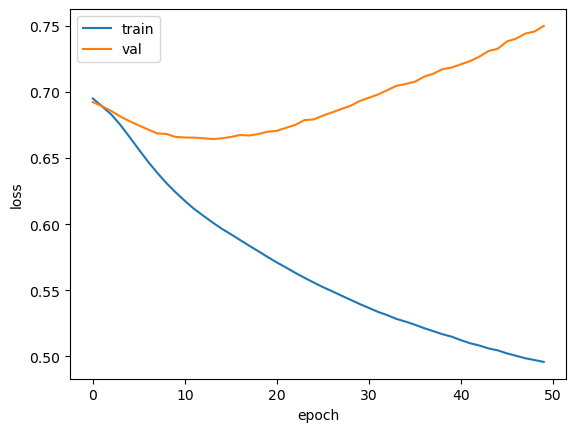

In [37]:
plt.plot(loss.history['loss'])
plt.plot(loss.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()